Link for resources:

1- https://hannibunny.github.io/nlpbook/05representations/01WordEmbeddingImplementation.html

2- https://www.analyticsvidhya.com/blog/2024/11/continuous-bag-of-words-cbow/

#1- Skipgram

In [2]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [1]:
from gensim.models import KeyedVectors
import numpy as np
import warnings
import gensim.downloader as api

In [2]:
np.__version__

'1.26.4'

In [3]:
word_vectors = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [5]:
result = word_vectors.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [10]:
similarity = word_vectors.similarity('woman', 'man')
print(similarity)

0.8323495


In [11]:
word_vectors.most_similar("cat", topn=20)

[('dog', 0.8798074722290039),
 ('rabbit', 0.7424427270889282),
 ('cats', 0.732300341129303),
 ('monkey', 0.7288709878921509),
 ('pet', 0.719014048576355),
 ('dogs', 0.7163872718811035),
 ('mouse', 0.6915250420570374),
 ('puppy', 0.6800068020820618),
 ('rat', 0.6641027331352234),
 ('spider', 0.6501135230064392),
 ('elephant', 0.6372530460357666),
 ('boy', 0.6266893744468689),
 ('bird', 0.6266420483589172),
 ('baby', 0.6257247924804688),
 ('pig', 0.6254673004150391),
 ('horse', 0.6251551508903503),
 ('snake', 0.6227242350578308),
 ('animal', 0.6200780272483826),
 ('dragon', 0.6187657713890076),
 ('duck', 0.6158087253570557)]

In [12]:
sim = word_vectors.n_similarity(['sushi', 'shop'], ['japanese', 'restaurant'])
print(sim)

0.7066633


In [13]:
vector = word_vectors['computer']
print(vector.shape)
print(vector[:10])

(100,)
[-0.16298   0.30141   0.57978   0.066548  0.45835  -0.15329   0.43258
 -0.89215   0.57747   0.36375 ]


In [14]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [16]:
tsneModel=TSNE(n_components=2,random_state=0)
np.set_printoptions(suppress=True)
model2d=tsneModel.fit_transform(word_vectors[word_vectors.index_to_key[300:600]])

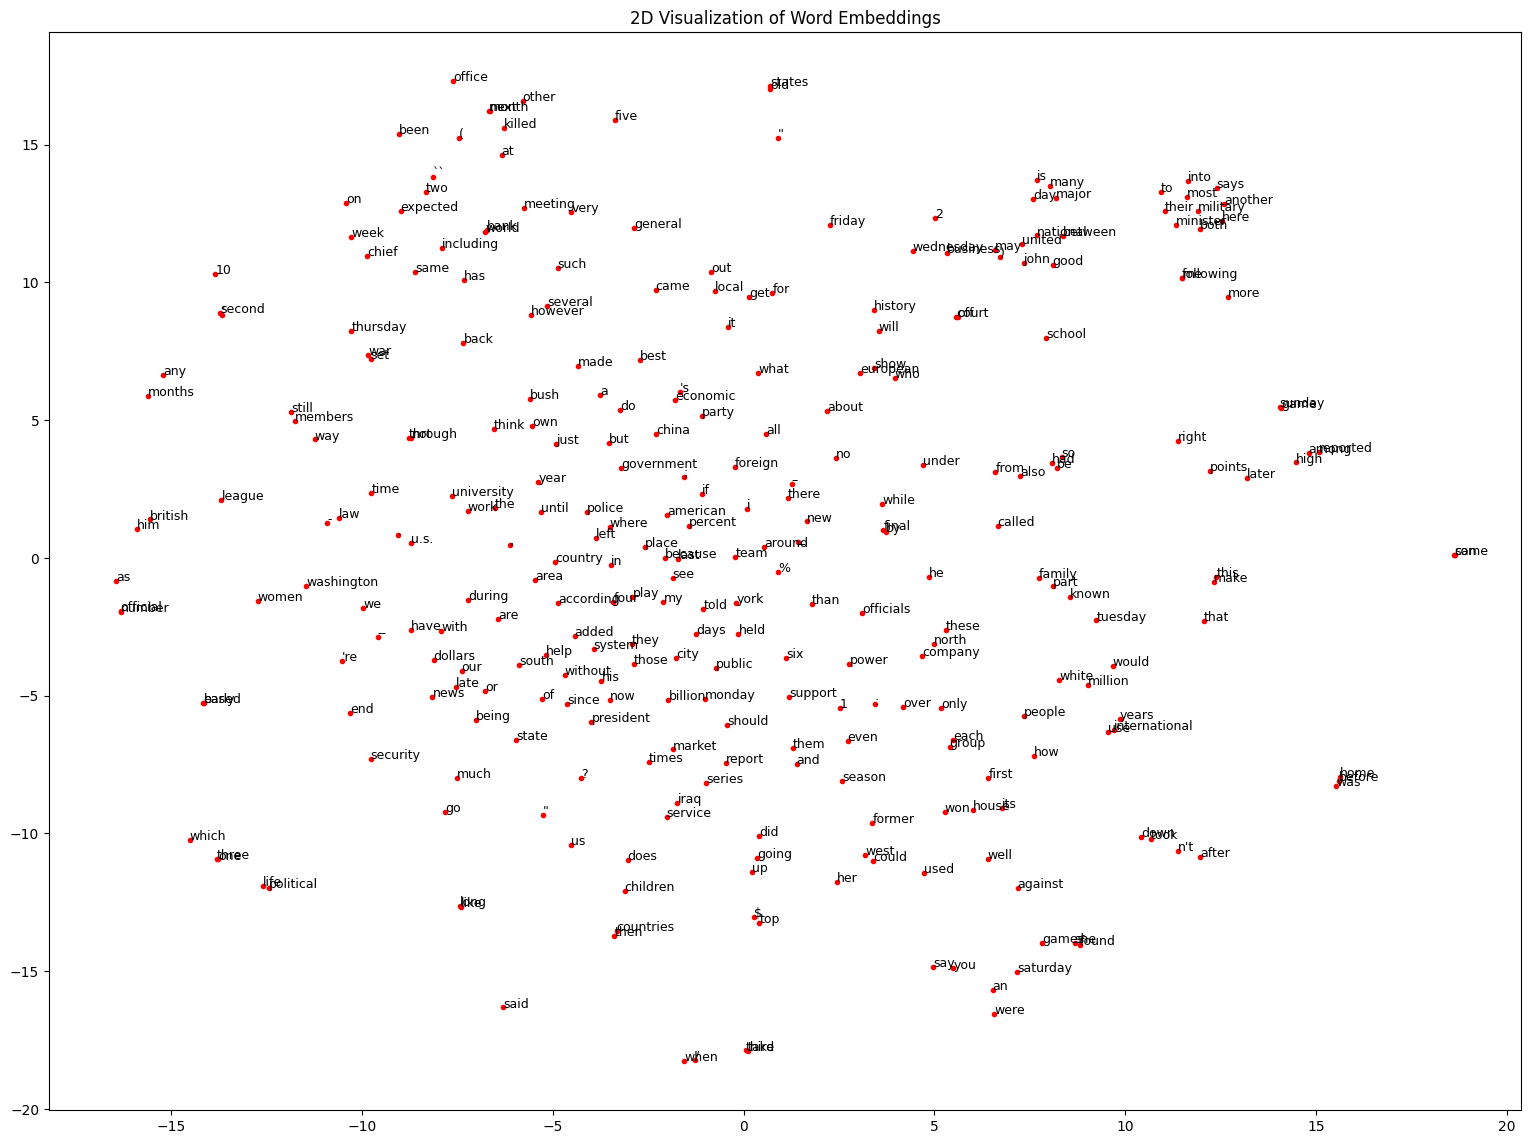

In [18]:
import matplotlib.pyplot as plt

# Plot the first 300 words and their 2D projections
plt.figure(figsize=(19, 14))
for idx, vec in enumerate(model2d[:300]):
    # Get the corresponding word
    word = word_vectors.index_to_key[idx]

    # Plot the point and annotate it
    plt.plot(vec[0], vec[1], 'r.')
    plt.text(vec[0], vec[1], word, fontsize=9)

plt.title("2D Visualization of Word Embeddings")
plt.show()


Vector representation of 'fox' [-0.06810732 -0.01892803  0.11537147 -0.15043275 -0.07872207]


#2- CBOW

In [22]:
from gensim.models import Word2Vec


sentences = [["the", "quick", "brown", "fox"],
           ["jumps", "over", "the", "lazy", "dog"]]

model = Word2Vec(sentences, vector_size=100, window=2, min_count=1, sg=0)

vector = model.wv["fox"]

print(model.wv.most_similar("fox"))

[('jumps', 0.13887985050678253), ('over', 0.13149002194404602), ('lazy', 0.06408979743719101), ('brown', 0.019152285531163216), ('dog', 0.009391160681843758), ('quick', -0.05774582922458649), ('the', -0.05987628921866417)]
